In [45]:
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with open('Data/2015.tsv','r') as tsv:
    data = [line.strip().split('\t') for line in tsv]
    
col_names = data[0]
df = pd.DataFrame(data, columns=col_names)
df = df[1:]

#open code_sex.csv and convert it to a DataFrame
with open('Data/code_sex.csv','r') as csv:
    sex_descrip = [line.strip().split(',') for line in csv]

sex_header = sex_descrip[0]
df_sex = pd.DataFrame(sex_descrip, columns=sex_header)
df_sex = df_sex[1:]
indexed_df_sex = df_sex.set_index('Code')

#open code_body_part.csv and convert it to a DataFrame
with open('Data/code_body_part.csv','r') as csv:
    body_part_descrip = [line.strip().split(',') for line in csv]

body_part_header = body_part_descrip[0]
df_body_part = pd.DataFrame(body_part_descrip, columns=body_part_header)
df_body_part = df_body_part[1:]
indexed_df_body_part = df_body_part.set_index('Code')

#open code_diagnosis.csv and convert it to a DataFrame
with open('Data/code_diagnosis.csv','r') as csv:
    diagnosis_descrip = [line.strip().split(',') for line in csv]

diagnosis_header = diagnosis_descrip[0]
df_diagnosis = pd.DataFrame(diagnosis_descrip, columns=diagnosis_header)
df_diagnosis = df_diagnosis[1:]
indexed_df_diagnosis = df_diagnosis.set_index('Code')

#open code_disposition.csv and convert it to a DataFrame
with open('Data/code_disposition.csv','r') as csv:
    disposition_descrip = [line.strip().split(',') for line in csv]

disposition_header = disposition_descrip[0]
df_disposition = pd.DataFrame(disposition_descrip, columns=disposition_header)
df_disposition = df_disposition[1:]
indexed_df_disposition = df_disposition.set_index('Code')

#open code_fire.csv and convert it to a DataFrame
with open('Data/code_fire.csv','r') as csv:
    fire_descrip = [line.strip().split(',') for line in csv]

fire_header = fire_descrip[0]
df_fire = pd.DataFrame(fire_descrip, columns=fire_header)
df_fire = df_fire[1:]
indexed_df_fire = df_fire.set_index('Code')

#open code_locale.csv and convert it to a DataFrame
with open('Data/code_locale.csv','r') as csv:
    locale_descrip = [line.strip().split(',') for line in csv]

locale_header = locale_descrip[0]
df_locale = pd.DataFrame(locale_descrip, columns=locale_header)
df_locale = df_locale[1:]
indexed_df_locale = df_locale.set_index('Code')

#open code_product.csv and convert it to a DataFrame
with open('Data/code_product.csv','r') as csv:
    product_descrip = [line.strip().split(',',1) for line in csv]

product_header = product_descrip[0]
df_product = pd.DataFrame(product_descrip, columns=product_header)
df_product = df_product[1:]
indexed_df_product = df_product.set_index('Code')

#open code_race.csv and convert it to a DataFrame
with open('Data/code_race.csv','r') as csv:
    race_descrip = [line.strip().split(',') for line in csv]

race_header = race_descrip[0]
df_race = pd.DataFrame(race_descrip, columns=race_header)
df_race = df_race[1:]
indexed_df_race = df_race.set_index('Code')

#merge all the codes
df['sex_descrip']=df.sex.map(indexed_df_sex.Description)
df['body_part_descrip']=df.body_part.map(indexed_df_body_part.Description)
df['diag_descrip']=df.diag.map(indexed_df_diagnosis.Description)
df['disposition_descrip']=df.disposition.map(indexed_df_disposition.Description)
df['fire_descrip']=df.fmv.map(indexed_df_fire.Description)
df['locale_descrip']=df.location.map(indexed_df_locale.Description)
df['product1_descrip']=df.prod1.map(indexed_df_product.Description)
df['product2_descrip']=df.prod2.map(indexed_df_product.Description)
df['race_descrip']=df.race.map(indexed_df_race.Description)

#combine the 2 narr fields into 1
df['Notes'] = df['narr1'].map(str) + df['narr2'].map(str)

df1 = df[['CPSC Case #', 
         'trmt_date', 
         'psu', 
         'weight', 
         'age', 
         'sex_descrip', 
         'race_descrip',
         'body_part_descrip', 
         'diag_descrip', 
         'disposition_descrip', 
         'fire_descrip', 
         'locale_descrip', 
         'product1_descrip', 
         'product2_descrip', 
         'Notes']]

#convert numerical columns to numeric data type
df1 = df1.apply(lambda x: pd.to_numeric(x,errors="ignore"))

#convert 'trmt_date' column to datetime type
df1['trmt_date'] = df1['trmt_date'].apply(lambda x: pd.to_datetime(x,format='%m/%d/%Y'))

#adjust ages >120yo
def age_filter(age):
    if age > 120:
        return 1
    else:
        return age

df1['age'] = df1['age'].astype(int).map(age_filter)

#extra functions
def textfind(dataframe, field, string):
    """ Takes dataframe, field (column in the dataframe), and a string to search
    Allow for use of regular expressions.
    Returns a dataframe of the records where the string is found"""
    import re
    a = [df1.loc[i] for i in range(1,len(dataframe)) \
         if re.search(string, dataframe[field][i])]
    return pd.DataFrame(a)
    
def notereader(dataframe):
    """ Takes a dataframe that contains the 'Notes' field and prints it out in a
    readable fashion.
    Returns a dictionary of Index (integer): Note (string) pairs"""
    output_dict ={}
    for i in dataframe.index:           
        output_dict[i] = dataframe.Notes[i]
        print ("INDEX", i,"\n", dataframe.Notes[i],"\n")
    return output_dict



TypeError: 'numpy.int64' object is not callable

# Time injuries 

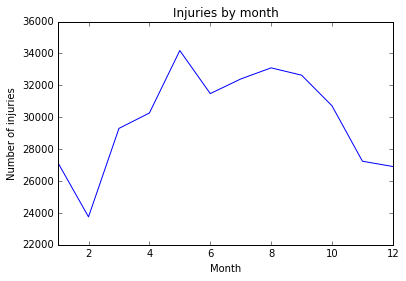

In [12]:
#injuries by month

#reindex to have dates as index
indexed_time = df1.set_index('trmt_date')
indexed_time['Count'] = 1

#group dates by months
month_index = indexed_time['Count'].groupby(indexed_time.index.month).count()
month_graph = month_index.plot(title = "Injuries by month")
month_graph.set_xlabel("Month")
month_graph.set_ylabel("Number of injuries")


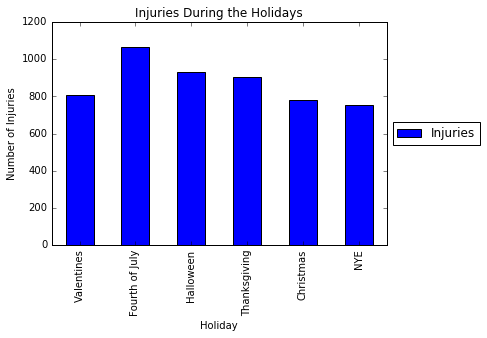

In [51]:
#Combined holiday graph

holiday_data = {'Holiday': ['Valentines','Fourth of July', 'Halloween', 'Thanksgiving', 'Christmas', 'NYE'],
               'Injuries': [val_count, indep_count, hallow_count, thanks_count, christmas_count, nye_count]}

df_holiday = pd.DataFrame(holiday_data)
holiday_graph = df_holiday.plot(kind = 'bar', x = 'Holiday', y = 'Injuries', title = "Injuries During the Holidays")
holiday_graph.set_ylabel("Number of Injuries")


#move legend outside of graph
holiday_graph.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

In [53]:
#injuries on holidays

#reindex to set time as index
time = df1.set_index('trmt_date')

#valentines injury count
valentines = time['2015-02-14']
valentines['Count'] = 1
val_count = valentines['Count'].count()

#valentines product related injuries males vs females
val_graphF = valentines[valentines.sex_descrip == 'FEMALE'].product1_descrip.value_counts().head(10)
val_graphF = pd.DataFrame(val_graphF)
val_graphF.columns = ['Injuries']

val_graphM = valentines[valentines.sex_descrip == 'MALE'].product1_descrip.value_counts().head(10)
val_graphM = pd.DataFrame(val_graphM)
val_graphM.columns = ['Injuries']
val_graphM

/Users/Jen2/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Injuries
"""BASKETBALL, ACTIVITY AND RELATED EQUIPMENT""",36
STAIRS OR STEPS,30
FLOORS OR FLOORING MATERIALS,23
"""BEDS OR BEDFRAMES, OTHER OR NOT SPEC """,20
"""BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN OR ALL-TERRAIN)""",15
"""CHAIRS, OTHER OR NOT SPECIFIED """,14
"""TABLES (EXCL. BABY CHANGING TABLES, BILLIARD OR POOL TABLES""",13
"""DOORS, OTHER OR NOT SPECIFIED """,9
"""WRESTLING (ACTIVITY, APPAREL OR EQUIPMENT)""",9
CEILINGS AND WALLS (PART OF COMPLETED STRUCTURE),7


In [55]:
#christmas injury count
christmas = time['2015-12-24']
christmas['Count'] = 1
christmas_count = christmas['Count'].count()

#christmas product related injuries males vs females
xmas_graphF = christmas[christmas.sex_descrip == 'FEMALE'].product1_descrip.value_counts().head(10)
xmas_graphF = pd.DataFrame(xmas_graphF)
xmas_graphF.columns = ['Injuries']
xmas_graphF

xmas_graphM = christmas[christmas.sex_descrip == 'MALE'].product1_descrip.value_counts().head(10)
xmas_graphM = pd.DataFrame(xmas_graphM)
xmas_graphM.columns = ['Injuries']
xmas_graphM

/Users/Jen2/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Injuries
FLOORS OR FLOORING MATERIALS,38
STAIRS OR STEPS,34
"""BEDS OR BEDFRAMES, OTHER OR NOT SPEC """,23
"""TABLES (EXCL. BABY CHANGING TABLES, BILLIARD OR POOL TABLES""",17
"""KNIVES, NOT ELSEWHERE CLASSIFIED""",16
"""BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN OR ALL-TERRAIN)""",12
CEILINGS AND WALLS (PART OF COMPLETED STRUCTURE),11
"""CHAIRS, OTHER OR NOT SPECIFIED """,9
"""WINDOWS & WINDOW GLASS, EXCL STORM WINDO""",8
"""BASKETBALL, ACTIVITY AND RELATED EQUIPMENT""",8


In [75]:
#nye injury count
nye = time['2015-12-31']
nye['Count'] = 1
nye_count = nye['Count'].count()


#nye product related injuries males vs females
nye_graphF = nye[nye.sex_descrip == 'FEMALE'].product1_descrip.value_counts().head(10)
nye_graphF = pd.DataFrame(nye_graphF)
nye_graphF.columns = ['Injuries']
nye_graphF

nye_graphM = nye[nye.sex_descrip == 'MALE'].product1_descrip.value_counts().head(10)
nye_graphM = pd.DataFrame(nye_graphM)
nye_graphM.columns = ['Injuries']
nye_graphM


/Users/Jen2/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Injuries
FLOORS OR FLOORING MATERIALS,43
STAIRS OR STEPS,33
"""BEDS OR BEDFRAMES, OTHER OR NOT SPEC """,18
"""TABLES (EXCL. BABY CHANGING TABLES, BILLIARD OR POOL TABLES""",14
"""DOORS, OTHER OR NOT SPECIFIED """,11
BATHTUBS OR SHOWERS,10
"""KNIVES, NOT ELSEWHERE CLASSIFIED""",8
"""SOFAS, COUCHES, DAVENPORTS, DIVANS OR STUDIO COUCHES""",8
"""CHAIRS, OTHER OR NOT SPECIFIED """,8
GENERAL HOME OR ROOM INVOLVEMENT IN FIRES,7


In [59]:
#halloween injury count
halloween = time['2015-10-31']
halloween['Count'] = 1
hallow_count = halloween['Count'].count()

#halloween product related injuries males vs females
hallow_graphF = halloween[halloween.sex_descrip == 'FEMALE'].product1_descrip.value_counts().head(10)
hallow_graphF = pd.DataFrame(hallow_graphF)
hallow_graphF.columns = ['Injuries']
hallow_graphF

hallow_graphM = halloween[halloween.sex_descrip == 'MALE'].product1_descrip.value_counts().head(10)
hallow_graphM = pd.DataFrame(hallow_graphM)
hallow_graphM.columns = ['Injuries']
hallow_graphM

/Users/Jen2/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Injuries
"""FOOTBALL (ACTIVITY, APPAREL OR EQUIPMENT)""",79
STAIRS OR STEPS,31
"""SOCCER (ACTIVITY, APPAREL OR EQUIPMENT)""",25
FLOORS OR FLOORING MATERIALS,22
"""KNIVES, NOT ELSEWHERE CLASSIFIED""",18
"""BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN OR ALL-TERRAIN)""",17
"""BEDS OR BEDFRAMES, OTHER OR NOT SPEC """,16
"""BASKETBALL, ACTIVITY AND RELATED EQUIPMENT""",15
CEILINGS AND WALLS (PART OF COMPLETED STRUCTURE),13
"""LADDERS, OTHER OR NOT SPECIFIED """,10


In [61]:
#thanksgiving injury count
thanksgiving = time['2015-11-25']
thanksgiving['Count'] = 1
thanks_count = thanksgiving['Count'].count()

#thanksgiving product related injuries males vs females
thanks_graphF = thanksgiving[thanksgiving.sex_descrip == 'FEMALE'].product1_descrip.value_counts().head(10)
thanks_graphF = pd.DataFrame(thanks_graphF)
thanks_graphF.columns = ['Injuries']
thanks_graphF

thanks_graphM = thanksgiving[thanksgiving.sex_descrip == 'MALE'].product1_descrip.value_counts().head(10)
thanks_graphM = pd.DataFrame(thanks_graphM)
thanks_graphM.columns = ['Injuries']
thanks_graphM

/Users/Jen2/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Injuries
FLOORS OR FLOORING MATERIALS,37
"""FOOTBALL (ACTIVITY, APPAREL OR EQUIPMENT)""",31
STAIRS OR STEPS,29
"""BASKETBALL, ACTIVITY AND RELATED EQUIPMENT""",23
"""KNIVES, NOT ELSEWHERE CLASSIFIED""",20
"""BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN OR ALL-TERRAIN)""",18
"""BEDS OR BEDFRAMES, OTHER OR NOT SPEC """,15
"""DOORS, OTHER OR NOT SPECIFIED """,13
"""TABLES (EXCL. BABY CHANGING TABLES, BILLIARD OR POOL TABLES""",10
CEILINGS AND WALLS (PART OF COMPLETED STRUCTURE),8


In [78]:
#july4 injury count
independence = time['2015-7-4']
independence['Count'] = 1
indep_count = independence['Count'].count()

#july4 product related injuries males vs females
indep_graphF = independence[independence.sex_descrip == 'FEMALE'].product1_descrip.value_counts().head(10)
indep_graphF = pd.DataFrame(indep_graphF)
indep_graphF.columns = ['Injuries']
indep_graphF

indep_graphM = independence[independence.sex_descrip == 'MALE'].product1_descrip.value_counts().head(10)
indep_graphM = pd.DataFrame(indep_graphM)
indep_graphM.columns = ['Injuries']
indep_graphM

/Users/Jen2/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Injuries
FIREWORKS,48
STAIRS OR STEPS,35
"""BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN OR ALL-TERRAIN)""",27
"""BASKETBALL, ACTIVITY AND RELATED EQUIPMENT""",18
"""BEDS OR BEDFRAMES, OTHER OR NOT SPEC """,18
"""KNIVES, NOT ELSEWHERE CLASSIFIED""",15
FLOORS OR FLOORING MATERIALS,14
ALL TERRAIN VEHICLES (FOUR WHEELS/OFF ROAD ONLY),13
"""LADDERS, OTHER OR NOT SPECIFIED """,12
"""DOORS, OTHER OR NOT SPECIFIED """,11


# DRUGS V ALCOHOL V POT

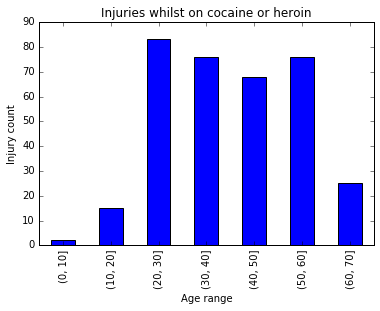

In [71]:
#drugs

#value counts by age containing cocaine/heroin
doped_af = df1[df1['Notes'].str.contains('COCAINE|HEROIN')]
age_doped = doped_af['age'].value_counts(sort = False)

#bin ages into groups of 10 years and sums value counts per bin 
bins = np.arange(age_doped.index.min(), age_doped.index.max(), 10)
doped_age_groups = age_doped.groupby(pd.cut(age_doped.index, bins))
drug_bins = doped_age_groups.sum()
drug_graph = drug_bins.plot(kind = 'bar', title = "Injuries whilst on cocaine or heroin")

drug_graph.set_xlabel("Age range")
drug_graph.set_ylabel("Injury count")

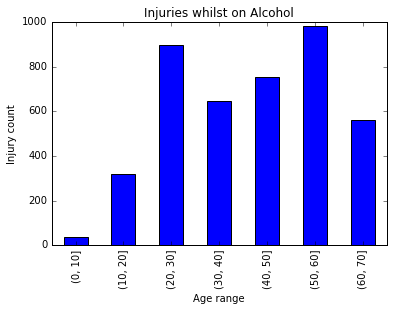

In [74]:
#value counts by age containing alcohol-related terms
drunk_af = df1[df1['Notes'].str.contains('DRUNK|ALCOHOL|ETOH|INTOXICATED')]
drunk_af = drunk_af['age'].value_counts(sort = False)

#bin ages
drunk_age_groups = drunk_af.groupby(pd.cut(drunk_af.index, bins))
drunk_bins = drunk_age_groups.sum()
drunk_graph = drunk_bins.plot(kind = 'bar', title = "Injuries whilst on Alcohol")

#for labeling bar graphs
drunk_graph.set_xlabel("Age range")
drunk_graph.set_ylabel("Injury count")


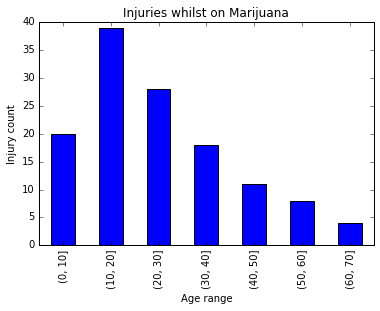

In [72]:
#value counts by age containing marijuana-related terms

high_filter = df1[df1['Notes'].str.contains('HIGH|MARIJUANA')]

high_filter = high_filter[high_filter['Notes'].str.contains('HEELED|CARBON|MILAGE|HIGHWAY|TOO|FX') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('CHAIR|BP|FIVE|ANKLE|SHOT|SWING') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('HEELS|FLOWER') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('THIGH|POTATOES|POTHOLE|HOLE|SPILL|STOVE') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('BED|HIGHEST|HIGHER') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('BAR|HOT|FALL') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('SHELF') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('HEEL') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('STEPS') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('POWERED') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('STOOL') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('FT') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('FEET') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('UP') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('INTENSITY') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('HEEL') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('SCHOOL') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('SPEED') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('PRESSURE') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('CABINET') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('JUMP') == False]
high_af = high_filter[high_filter['Notes'].str.contains('TOP') == False]

#checking filtered out notes
# pd.options.display.max_colwidth = 1000
# high_af['Notes']

#value counts by age containing high-related terms
high_af = high_af['age'].value_counts(sort = False)
high_age_groups = high_af.groupby(pd.cut(high_af.index, bins))
high_bins = high_age_groups.sum()
high_graph = high_bins.plot(kind = 'bar')

high_graph.set_title("Injuries whilst on Marijuana")
high_graph.set_xlabel("Age range")
high_graph.set_ylabel("Injury count")

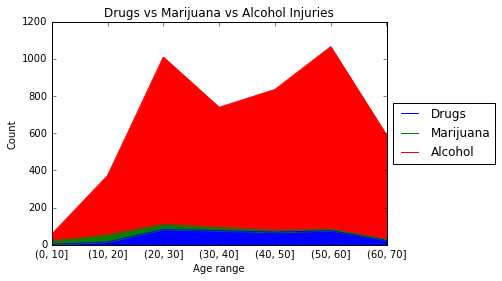

In [42]:
#combine drunk, marijuana, drugs

df_influenced = pd.concat([drug_bins, high_bins, drunk_bins], axis = 1)
df_influenced.columns = ['Drugs', 'Marijuana', 'Alcohol']
influenced_graph = df_influenced.plot(kind = 'area')

influenced_graph.set_title("Injuries whilst on Drugs vs Marijuana vs Alcohol")
influenced_graph.set_xlabel("Age range")
influenced_graph.set_ylabel("Injury count")

#move legend outside of plot
influenced_graph.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

# Weight injuries

In [ ]:

# #From 6 most common weights for injuries, ranking heaviest to lightest weights and showing product description
# weight_1 = df1[df1['weight'].str.contains('97.9239')]
# dfweight1 = weight_1['product1_descrip'].value_counts().head()

# weight_2 = df1[df1['weight'].str.contains('85.7374')]
# dfweight2 = weight_2['product1_descrip'].value_counts().head()

# weight_3 = df1[df1['weight'].str.contains('83.2157')]
# dfweight3 = weight_3['product1_descrip'].value_counts().head()

# weight_4 = df1[df1['weight'].str.contains('80.8381')]
# dfweight4 = weight_4['product1_descrip'].value_counts().head()

# weight_5 = df1[df1['weight'].str.contains('78.5926')]
# dfweight5 = weight_5['product1_descrip'].value_counts().head()

# weight_6 = df1[df1['weight'].str.contains('74.8813')]
# dfweight6 = weight_6['product1_descrip'].value_counts().head()

# weight_7 = df1[df1['weight'].str.contains('49.2646')]
# dfweight7 = weight_7['product1_descrip'].value_counts().head()

# weight_7 = df1[df1['weight'].str.contains('37.6645 ')]
# dfweight8 = weight_7['product1_descrip'].value_counts().head()

# # stacked bar graph
# weight_graph = pd.DataFrame({'97lbs':dfweight1, '85lbs':dfweight2, '83lbs':dfweight3, '80lbs':dfweight4, '78lbs':dfweight5, '75lbs':dfweight6, '49lbs':dfweight7, '37lbs':dfweight8}).plot(kind = 'bar', stacked = True)
# weight_graph.set_ylabel('Number of injuries')
# weight_graph.set_xlabel('Products causing injury')


In [14]:
#Looking for weight associated injuries

#value counts for weights
df_weight = df1['weight'].value_counts().sort_index(ascending = False)
#round weight index from float to int
df_weight.index = df_weight.index.map(int)

#bin weights
weight_bins = np.arange(df_weight.index.min(), df_weight.index.max(), 5)
                       
weight_age_groups = df_weight.groupby(pd.cut(df_weight.index, weight_bins))
weight_age_groups

# Girl vs Boy

In [ ]:
# Girls v Boys
# General injuries 

gvb_general = df1['sex_descrip'].value_counts().plot(kind = "bar")
gvb_general = gvb_general.set_ylabel("Number of injuries")
gvb_general

In [ ]:
# Girls v Boys
# Most common products
    
gvb_products = df1['product1_descrip'].value_counts().head(10).plot(kind = 'bar', legend=None, title = "The most dangerous products for males vs females")
gvb_products.set_xlabel("Product types")
gvb_products.set_ylabel("Frequency of occurences")
gvb_products

# Trying to groupby sex, then 10 most common things for each sex
y = df1.groupby(['sex_descrip', 'product1_descrip'], sort = True).size()

In [ ]:
#Most commonly injured body parts

body_parts = df1['body_part_descrip'].value_counts().plot(kind = 'bar')
body_parts

In [ ]:

# Using Omar's pretty histographs
# M_doped = doped_af[doped_af.sex_descrip == 'MALE'].age
# F_doped = doped_af[doped_af.sex_descrip == 'FEMALE'].age
# Mdoped = plt.hist(doped_M_bar,alpha=0.5, bins = 14, color = 'blue',label='MALE')
# Fdoped = plt.hist(doped_F_bar,alpha=0.5, bins = 10,color = 'red',label='FEMALE')